## GENERAL INTRODUCTION

A bike company has realeased their customers data to us for analysis. The data includes demographic features and purchase history of the customers.  

The bike company is especially interested in discovering any apparent relationships between demographic features known about the customers and the average monthly spend.

We are going to use python, stats and machine learning to help them solve their problem.

In [1]:
#Import the libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in the data(train and test) and view 
pd.set_option('display.expand_frame_repr', False)
dftest = pd.read_csv('../input/test_technidus.csv') #test data 
#pd.set_option('display.max_colwidth', -1)
dftrain = pd.read_csv('../input/train_technidus.csv') #train data 
dftrain.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,22409,NaN,Candace,NaN,Madan,NaN,1488 Guadalupe,NaN,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0115,8/15/1979,Bachelors,Clerical,F,S,1,0,0,0,11336,37,0
1,15809,NaN,Christian,NaN,Sharma,NaN,6086 Glen Wood Drive,NaN,Port Macquarie,New South Wales,Australia,2444,1 (11) 500 555-0159,9/15/1960,Partial College,Skilled Manual,M,M,1,3,4,5,81978,135,1
2,27510,NaN,Cole,Q,Bailey,NaN,6253 Panorama Dr.,NaN,Burlingame,California,United States,94010,350-555-0145,10/3/1976,Partial College,Professional,M,S,0,2,0,0,86892,70,0
3,17627,NaN,Dennis,M,Chen,NaN,3195 Rotherham Dr.,NaN,Maidenhead,England,United Kingdom,SL67RJ,1 (11) 500 555-0181,9/9/1974,Bachelors,Skilled Manual,M,M,1,0,1,1,68021,90,1
4,21238,NaN,Carl,NaN,Tang,NaN,516 Oak Park Blvd.,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,386-555-0142,9/25/1980,High School,Skilled Manual,M,S,0,2,0,0,52525,64,1


# Exploratory Analysis

Now that we have read in our data, we need to explore what we have been given so we know what hypothesis to formulate about the customers, and what features we need to prove or disprove our hypothesis. 

In [3]:
#lets start by finding how many customers we have in our data set 
print('There are %s customers in the dataset' %(len(dftrain)))


There are 7654 customers in the dataset


In [4]:
# Let us make sure that there are no customers that appear more than once in our dataset
idsUnique = len(set(dftrain.CustomerID))
idsTotal = dftrain.shape[0]
idsDupli = idsTotal - idsUnique
print ('There are %s duplictes in our dataset'%(idsDupli))

#check two, we expect unique instances in Customer id to be equal to dataset size
print( "There are %s unique ids and the size of the dataset is %d " %(len(dftrain.CustomerID.unique()), len(dftrain)))

There are 0 duplictes in our dataset
There are 7654 unique ids and the size of the dataset is 7654 


In [5]:
#Now, lets learn about the information we have on the customers, and what format they exist in
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7654 entries, 0 to 7653
Data columns (total 25 columns):
CustomerID              7654 non-null int64
Title                   49 non-null object
FirstName               7654 non-null object
MiddleName              4487 non-null object
LastName                7654 non-null object
Suffix                  0 non-null float64
AddressLine1            7654 non-null object
AddressLine2            123 non-null object
City                    7654 non-null object
StateProvinceName       7654 non-null object
CountryRegionName       7654 non-null object
PostalCode              7654 non-null object
PhoneNumber             7654 non-null object
BirthDate               7654 non-null object
Education               7654 non-null object
Occupation              7654 non-null object
Gender                  7654 non-null object
MaritalStatus           7654 non-null object
HomeOwnerFlag           7654 non-null int64
NumberCarsOwned         7654 non-null int64
N

We have 25 columns of information on the customers and we can see their various formats (the data types stored in each of these columns). 
We can also see that we are missing some information on some customers as indicated by null values present in a few of the columns. Let's investigate further!

In [6]:
#Now we need to see how many customers have missing information 
print (dftrain.isnull().sum())

CustomerID                 0
Title                   7605
FirstName                  0
MiddleName              3167
LastName                   0
Suffix                  7654
AddressLine1               0
AddressLine2            7531
City                       0
StateProvinceName          0
CountryRegionName          0
PostalCode                 0
PhoneNumber                0
BirthDate                  0
Education                  0
Occupation                 0
Gender                     0
MaritalStatus              0
HomeOwnerFlag              0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome               0
AveMonthSpend              0
BikeBuyer                  0
dtype: int64


Now we can see that for some customers, we dont have information on their *Title*, *Middle name*, *Suffix* and *AddressLine 2* as indicated by the number of null values.

These missing information are not too worrisome as they don't seem to be strong indicators on how much a person spends on avaerage in a month at a bike shop. However, lets try to understand why they are missing. 

So for Title, Suffix and Middle name, it is possible that when these were filled (assuming these information on customers were collected via self-form filling) the users didnt fill them or that they dont have middle names or suffixes so it did not apply to them.  

For address line 2, it is usually unecessary to fill unless you live in an apartment or condominium, where you'll need to fill in your aprtment number of floor number. Most people fill up Adress line 1, which is the case in our dataset and probably implies that not a lot of people in our dataset live in apartments or condos.


In [7]:
#Now that we know more about the missing information on our customers, we need to handle it
#We already know that the missing information are not strong indicators for what we are trying to predict so we can just leave them as they are
#However, we drop the suffix information seeing as all customersin the data do not have it
dftrain = dftrain.drop( axis = 1, columns = ['Suffix','Title'])
dftrain.head()




,CustomerID,FirstName,MiddleName,LastName,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,22409,Candace,NaN,Madan,1488 Guadalupe,NaN,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0115,8/15/1979,Bachelors,Clerical,F,S,1,0,0,0,11336,37,0
1,15809,Christian,NaN,Sharma,6086 Glen Wood Drive,NaN,Port Macquarie,New South Wales,Australia,2444,1 (11) 500 555-0159,9/15/1960,Partial College,Skilled Manual,M,M,1,3,4,5,81978,135,1
2,27510,Cole,Q,Bailey,6253 Panorama Dr.,NaN,Burlingame,California,United States,94010,350-555-0145,10/3/1976,Partial College,Professional,M,S,0,2,0,0,86892,70,0
3,17627,Dennis,M,Chen,3195 Rotherham Dr.,NaN,Maidenhead,England,United Kingdom,SL67RJ,1 (11) 500 555-0181,9/9/1974,Bachelors,Skilled Manual,M,M,1,0,1,1,68021,90,1
4,21238,Carl,NaN,Tang,516 Oak Park Blvd.,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,386-555-0142,9/25/1980,High School,Skilled Manual,M,S,0,2,0,0,52525,64,1


In [8]:
#let's get some stats on the data to help us understand our customers better and help us formulate our hypothesis better 
dftrain.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000
mean,18784.735824,0.695192,1.581657,1.253201,2.161092,82289.196891,76.505357,0.498171
std,4795.026146,0.460356,1.186209,1.659555,1.731424,40658.245901,29.465195,0.500029
min,11001.000000,0.000000,0.000000,0.000000,0.000000,10036.000000,22.000000,0.000000
25%,14760.750000,0.000000,1.000000,0.000000,1.000000,50765.750000,53.000000,0.000000
50%,18479.500000,1.000000,2.000000,0.000000,2.000000,82233.500000,72.000000,0.000000
75%,22431.500000,1.000000,2.000000,2.000000,4.000000,109853.500000,89.000000,1.000000
max,29481.000000,1.000000,4.000000,5.000000,5.000000,193721.000000,176.000000,1.000000


We can see descriptive stats of numerical data type columns. 

For number of cars owned, We can see that the mean number of cars owned is 1.58 which makes no sense in real life and can be rounded to 2. The maximum number of cars owned by a user is 4 and the minimum is 0. 

For number of children at home, the mean is 1.25 whcih again in real life makes no sense so we can round it to 1. The maximum number of kids at home is 5 and the minimum is 0. For total number of kids the mean is 2.16 which can be rounded to 2. Maximum is 5 and minimum is 0. 

For yearly income, we have to remember that there is no common demonination as the customers are from all around the world. So we might need to further preprocess this column or assume that they are all in one currency denomination. The mean is 82K , the maximum is 193K and the min is 10k.

For Average spend in a month, the mean is 76. The max is 176, while the min is 22. 


In [9]:
#so we need to understand the distrubition of the customers in this dataset

dftrain.columns #print out the column names

Index(['CustomerID', 'FirstName', 'MiddleName', 'LastName', 'AddressLine1',
       'AddressLine2', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
       'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

United States     3176
Australia         1554
United Kingdom     822
France             745
Germany            717
Canada             640
Name: CountryRegionName, dtype: int64


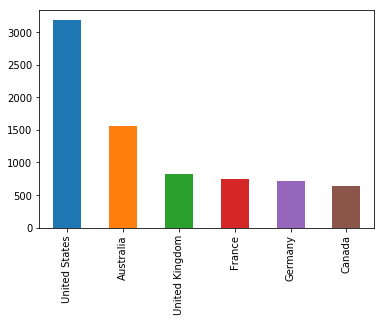

In [10]:
#Let's start with Nationality of our customers
print( dftrain.CountryRegionName.value_counts())
dftrain.CountryRegionName.value_counts().plot(kind = 'bar');

Most of the customers are from the United States.

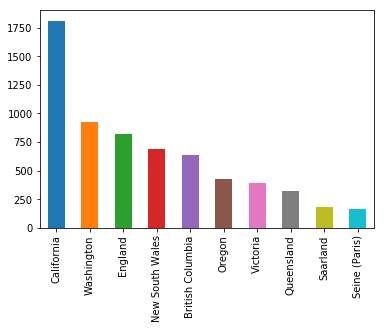

In [11]:
#let's move on to State/Province 
dftrain.StateProvinceName.value_counts().head(10).plot(kind = 'bar');

Since most of the customers are from the Unisted States, it isn't surprising to see American states (California,  Washington) as the most common states in our dataset. 

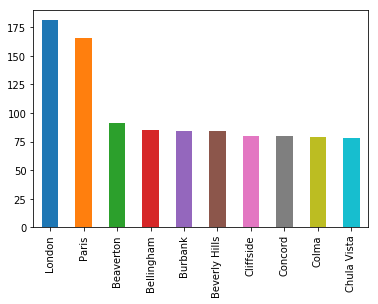

In [12]:
#let's move on to city
dftrain.City.value_counts().head(10).plot(kind = 'bar');

Surprisingly, London and Paris are the top 2 most common cities. I was expecting to see American cities take this spot seeing as most of our customers are from America. However, what we can observe is that our US customers live in a wider range of cities as compared to their British and French counterparts.

In [13]:
#Now that we are done with location, let's look at the age of our customers
print (dftrain.BirthDate.value_counts().head(10))
print (dftrain.BirthDate.dtype) #check what dtype it is stored as

9/3/1963     7
7/26/1971    6
3/18/1966    6
5/12/1964    6
6/24/1962    6
4/2/1965     6
2/18/1966    6
6/11/1967    6
4/12/1959    5
5/18/1953    5
Name: BirthDate, dtype: int64
object


In [14]:
#We can see that we have been given birthdates of our customers instead of their age, however we can derive their age with this 
#We will need to convert the birthdate which is stored as a sring object into a datetime data type, so we can get an age column out of it
dftrain.BirthDate = pd.to_datetime(dftrain.BirthDate, format='%m/%d/%Y')
print(dftrain.BirthDate.dtype) #check to see if the conversion was sucessful


#We need to do the same transformation on our test data 
dftest.BirthDate = pd.to_datetime(dftest.BirthDate, format='%m/%d/%Y')
print(dftest.BirthDate.dtype) #check to see if the conversion was sucessful

datetime64[ns]
datetime64[ns]


In [15]:
#now that it is converted we can get the age of the customers 
dftrain['Age'] = pd.to_datetime('today').year - dftrain.BirthDate.dt.year
print(dftrain['Age'].head(4)) #check


#Do the same for the test data
dftest['Age'] = pd.to_datetime('today').year - dftest.BirthDate.dt.year
print(dftest['Age'].head(4)) #check

0    40
1    59
2    43
3    45
Name: Age, dtype: int64
0    55
1    79
2    62
3    53
Name: Age, dtype: int64


count    7654.000000
mean       56.904102
std        10.539514
min        39.000000
25%        49.000000
50%        55.000000
75%        63.000000
max       108.000000
Name: Age, dtype: float64


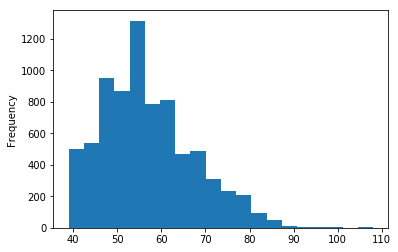

In [16]:
#now let us see  the distrubition of age in the dataset
print(dftrain['Age'].describe())
dftrain['Age'].plot(kind = 'hist', bins = 20);

The mean age is 57 so this dataset is made up mostly of middle aged customers. The minimum age here is 39 and the maximum age here is 108!

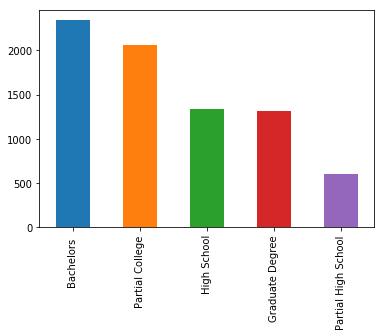

In [17]:
#Now onto Education
dftrain.Education.value_counts().plot(kind = 'bar');

We have mostly higher educated customers, with bachelors degree being the most common.

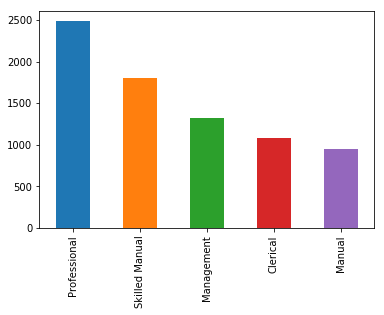

In [18]:
#Now onto Occupation
dftrain.Occupation.value_counts().plot(kind = 'bar');

We have mostly professionals

M    3984
F    3670
Name: Gender, dtype: int64


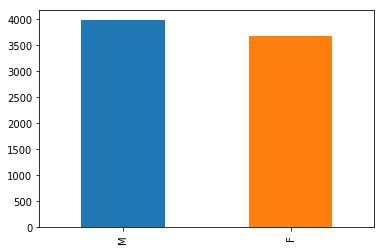

In [19]:
#Now onto Gender
print(dftrain.Gender.value_counts())
dftrain.Gender.value_counts().plot(kind = 'bar');

We have slightly more men than women in the dataset

M    3901
S    3753
Name: MaritalStatus, dtype: int64


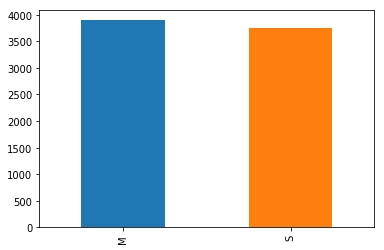

In [20]:

#Now, onto Marital Status
print(dftrain.MaritalStatus.value_counts())
dftrain.MaritalStatus.value_counts().plot(kind = 'bar');

We have slightly more married people than single people

1    5321
0    2333
Name: HomeOwnerFlag, dtype: int64


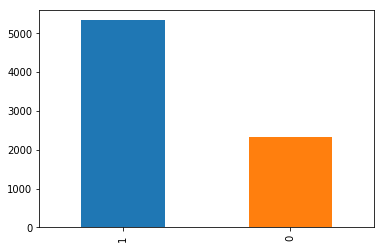

In [21]:
#Now, onto Home Owners
print(dftrain.HomeOwnerFlag.value_counts())
dftrain.HomeOwnerFlag.value_counts().plot(kind = 'bar');

We have more home owners in the dataset

2    2530
1    1973
0    1677
3     823
4     651
Name: NumberCarsOwned, dtype: int64


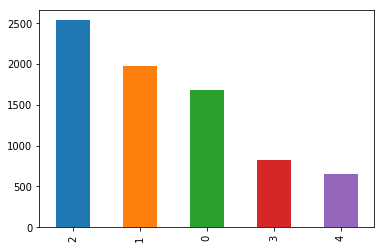

In [22]:
#Now, onto Number of Cars Owned
print(dftrain.NumberCarsOwned.value_counts())
dftrain.NumberCarsOwned.value_counts().plot(kind = 'bar');

Most customers have 2 or 1 car(s)

0    4115
1     936
2     845
3     624
4     576
5     558
Name: NumberChildrenAtHome, dtype: int64
0    1847
2    1338
1    1332
4    1204
3     974
5     959
Name: TotalChildren, dtype: int64


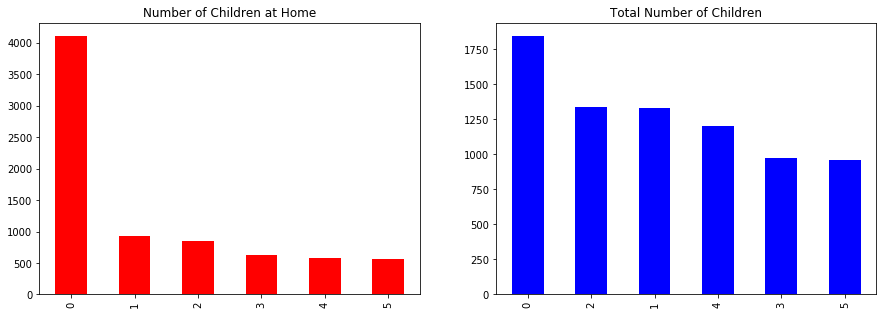

In [23]:
#Now onto Number of Children At Home and  Total Children,
print(dftrain.NumberChildrenAtHome.value_counts())
print(dftrain.TotalChildren.value_counts())
fig, axes = plt.subplots(1,2, figsize = (15,5) )
dftrain['NumberChildrenAtHome'].value_counts().plot.bar(ax = axes[0], color = 'red', title = 'Number of Children at Home');
dftrain['TotalChildren'].value_counts().plot.bar(ax = axes[1], color = 'blue',title='Total Number of Children');


We can see that most people have no children, however when we look at number of children at home, we see that 0 is way more than in total number of children meaning that it is made up people with no children and people whose children have moved out of the house. No surprise as the datset is made up mostly of middle aged customers.

0    3841
1    3813
Name: BikeBuyer, dtype: int64


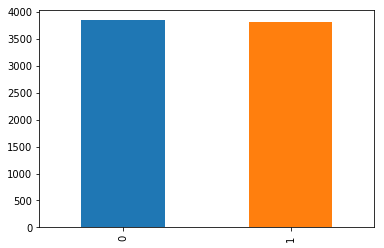

In [24]:
#Now onto people who bought bikes in the past
print(dftrain.BikeBuyer.value_counts())
dftrain.BikeBuyer.value_counts().plot(kind = 'bar');


There are slightly more people who have not bought bikes.

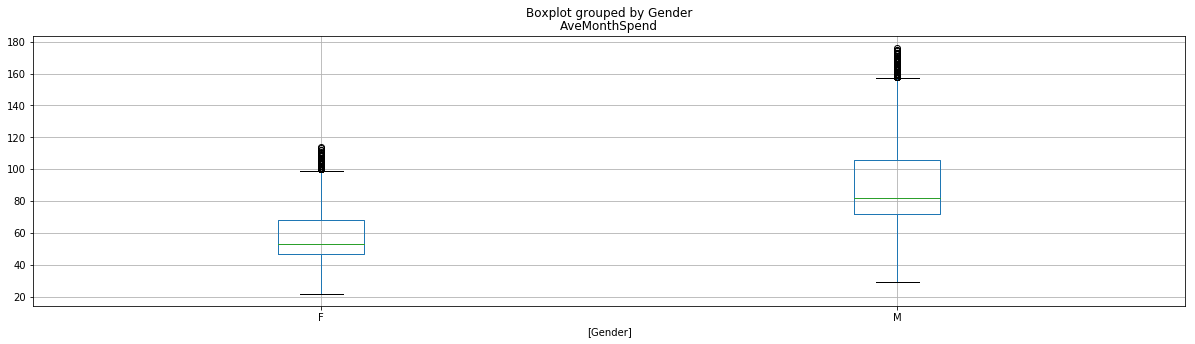

In [25]:
#Now we move onto the relationship bewteen the information we have on our customers and their average spend at the bike shop
#Average monthly spend and Customer Gender
dftrain.boxplot(column = 'AveMonthSpend', by= ['Gender'], figsize = (20, 5));


We can see that there is a significant difference in spend by Gender. That is, more  than 3/4 of men are more likely to spend more on average in the bike shop than men. This tells us that this information on our customers gender will be useful in our prediction. 

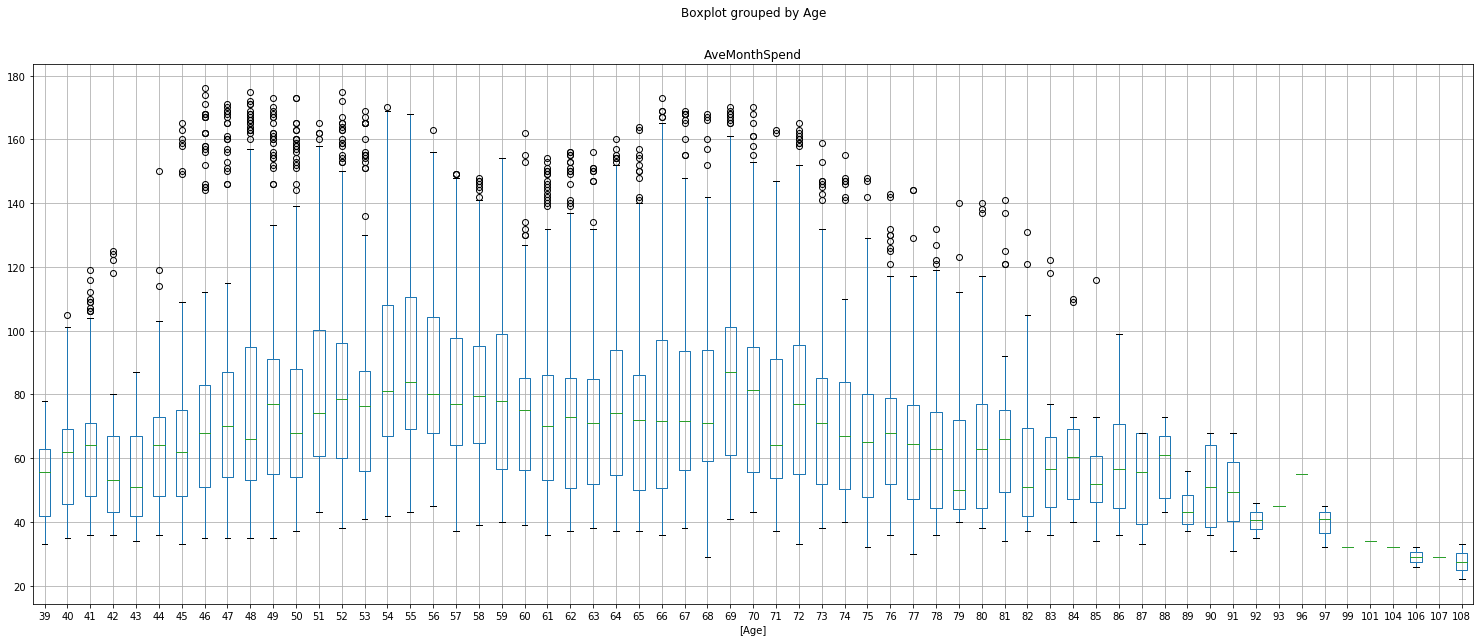

In [26]:
#Average monthly spend and Customer Age
dftrain.boxplot(column = 'AveMonthSpend', by= ['Age'], figsize = (25, 10));


Although not as clear as gender, we can see that there are some patterns in spending by Age. 

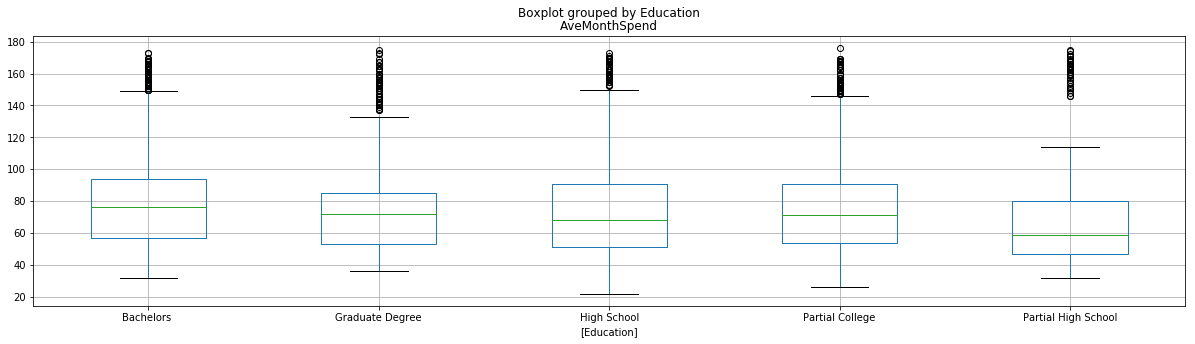

In [27]:
#Average monthly spend and Education Level
dftrain.boxplot(column = 'AveMonthSpend', by= ['Education'], figsize = (20, 5));


The median average spend by Education level differ but only slightly.  The lowest eductaion level (Partial High School) have the least median 

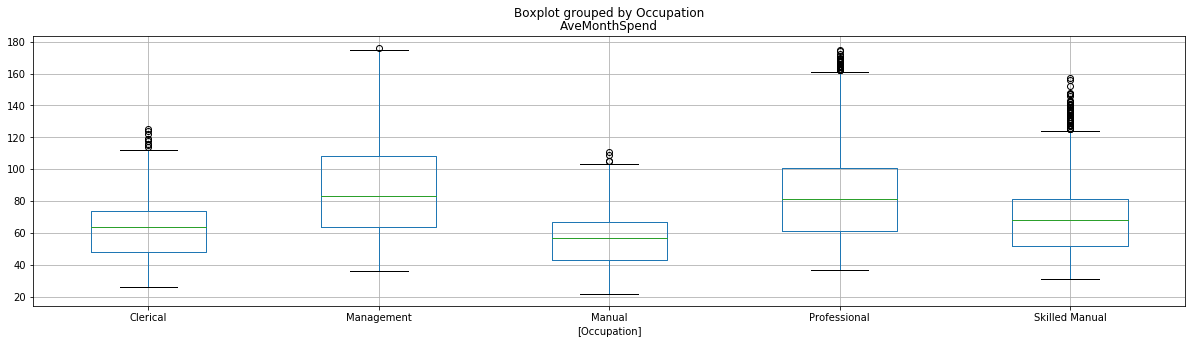

In [28]:
#AVerage Monthly Spend and Occupation
dftrain.boxplot(column = 'AveMonthSpend', by= ['Occupation'], figsize = (20, 5));


We can see that customers with senior level roles tend to spend more, and this makes sense as they earn more than lower level roles and therefore have more income to spend. This point to this information being useful for our prediction analysis. 

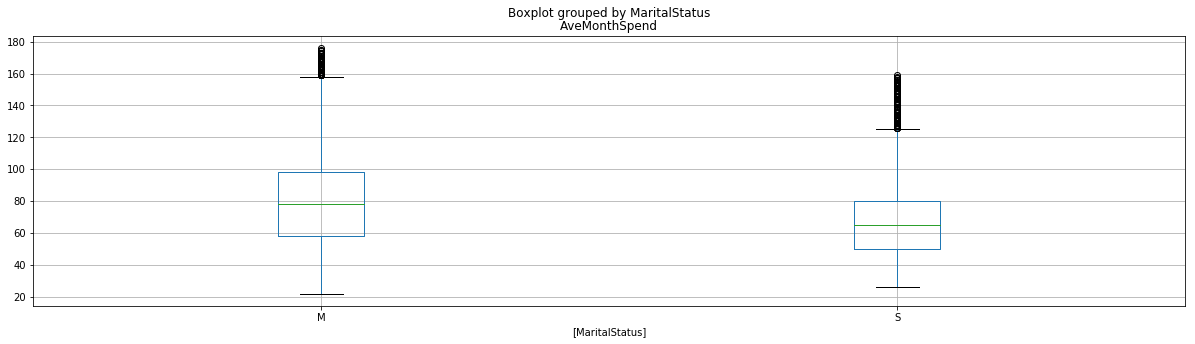

In [29]:
#Average Spend vs Marital Status
dftrain.boxplot(column = 'AveMonthSpend', by= ['MaritalStatus'], figsize = (20, 5));

We can observe that our married customers tend to spend more than their single counterparts. This is probably due to the fact that after marriage a lot of people report an increase in their level of wealth. This Marital status information will be used in our prediction analysis

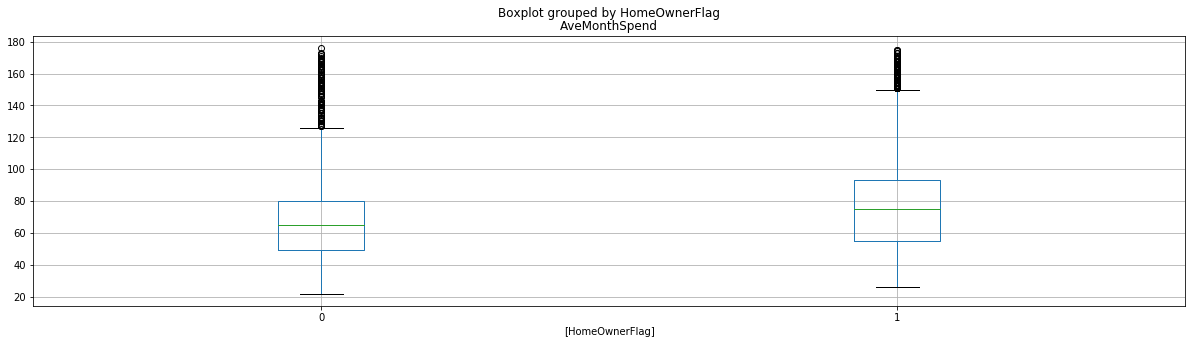

In [30]:
#Average Monthly Spend vs Home Owner Status
dftrain.boxplot(column = 'AveMonthSpend', by= ['HomeOwnerFlag'], figsize = (20, 5));


Our customers who are own owners have a higher median thatn their non-owners counterparts. This makes a bit of sense as one would expect people who own their houses, in general, to have higher level of wealth than people who dont. Hence more money to spend. This information will be used in our analysis.

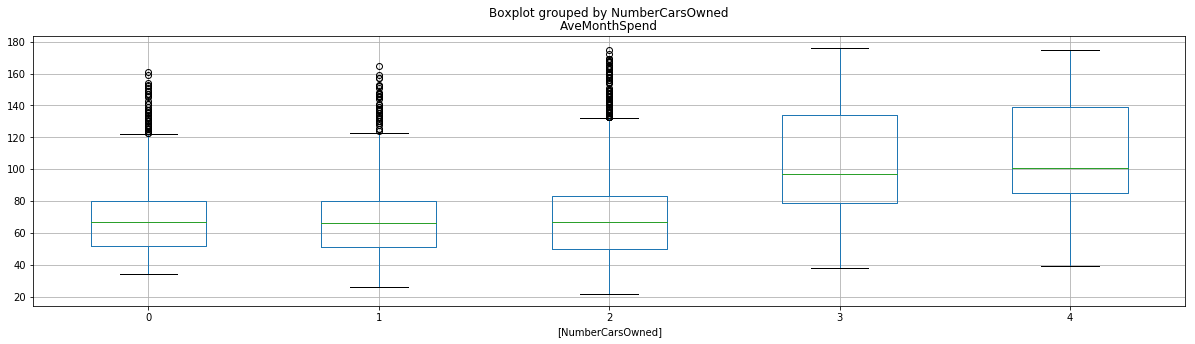

In [31]:
#Average Monthly spend vs Number of Cars Owned
dftrain.boxplot(column = 'AveMonthSpend', by= ['NumberCarsOwned'], figsize = (20, 5));



We can see that Customers who own 3 or more  cars spend way more than their counterparts who own 2 or less.
They probably ahve a higher level wealth which explains their spending behaviour. However, I would have expected people who own cars to spend less in a bike shop  and more in a motor shop. But we don't know their spending behvaior in motor shops as we don't have that information. This information will be used in our predictive analysis.

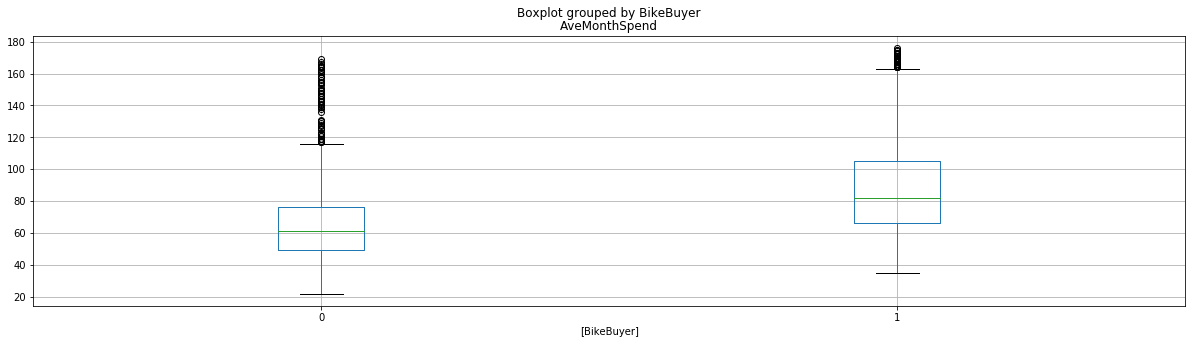

In [32]:
#Average Monthly spend vs Bike Ownership status
dftrain.boxplot(column = 'AveMonthSpend', by= ['BikeBuyer'], figsize = (20, 5));

Our customers who own bikes tend to spend more than their counterparts who dont. This makes sense as these customers are more likely to be in need of bike parts and service, thus why they are more likely to spend at a bike shop. Thus information will be used in our predictive analysis.

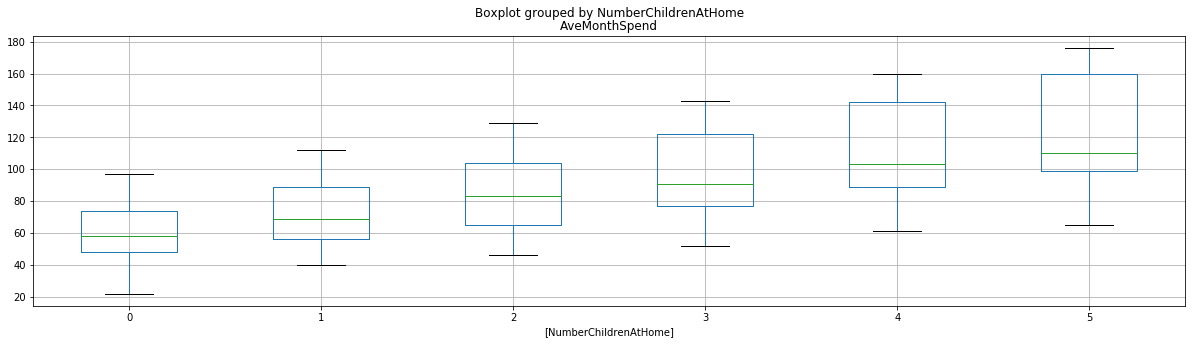

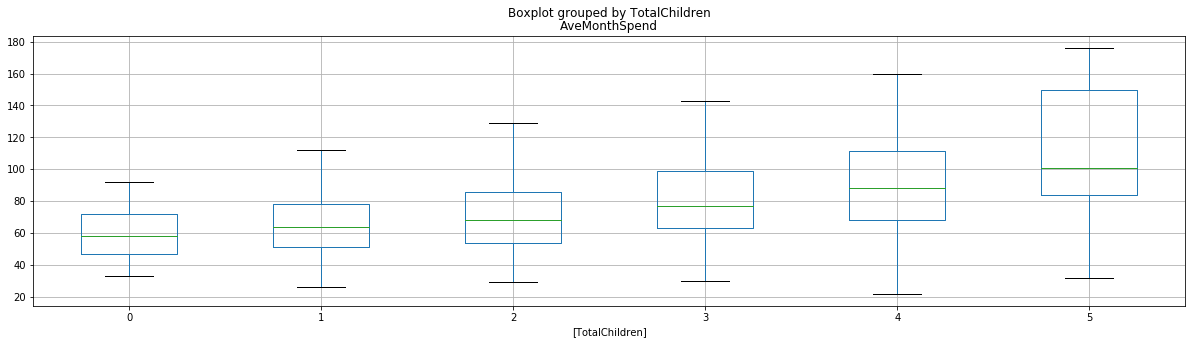

In [33]:
#Average Monthly Spend vs Chidlren (at Home  and Total)
dftrain.boxplot(column = 'AveMonthSpend', by= ['NumberChildrenAtHome'], figsize = (20, 5));
dftrain.boxplot(column = 'AveMonthSpend', by= ["TotalChildren"], figsize = (20, 5));


Customers with more kids either at home or in total tend to spend more. This information will be use din our predictive anlaysis

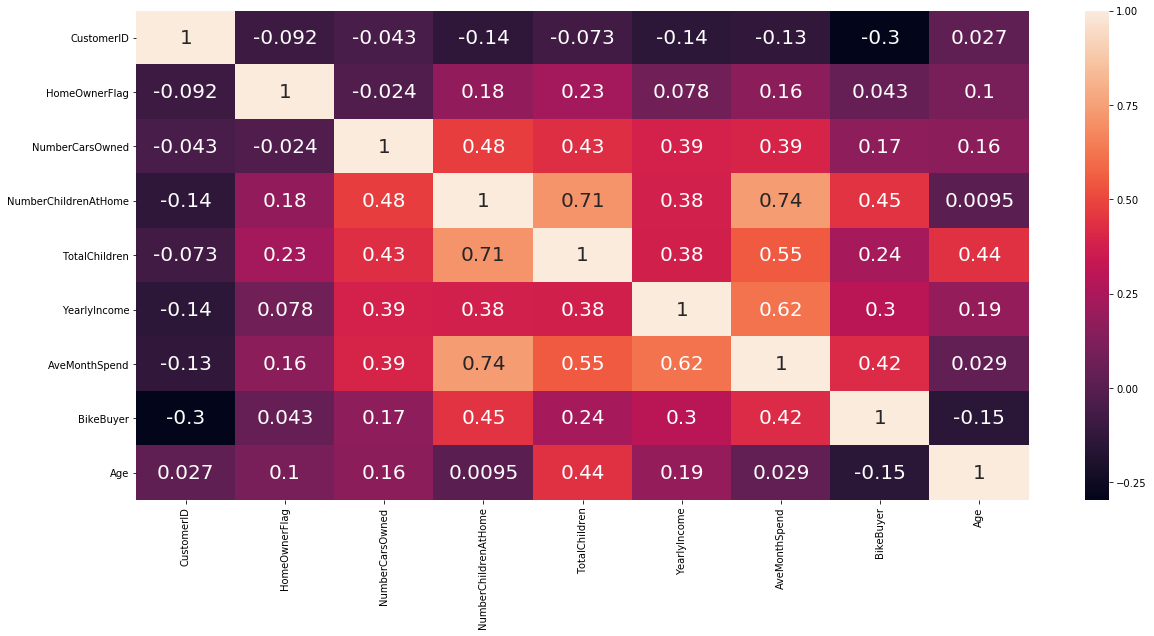

In [34]:
#Now that we have visualized the relationships bewteen most of our columns, let us see if the relationships we observed are significant
data = dftrain.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(data,
            xticklabels=data.columns.values,
            yticklabels=data.columns.values, annot_kws={'size': 20}, annot=True)
plt.show()

Average monthly spend correlates with Number of Cars owned, Number of Children at Home, Total Children, Yearly Income and bike buyer.

Surprisingly, unlike what we were expecting based on our visualization, Average monthly spend weakly correlates with Age and Home Owner Status. However, we will still include them in our analysis.

We can also see that there are some colums(Gender, Marital Status, Occupation and Education Level) we proposed to use in our predictive analysis that are not in teh correlation matrix. This si because these values are categoricals and need to be transformed inorder to be used. 

# PREPROCESSING

In order to use some columns for our prediction, we need to preprocess them/transform them in such a way that they are usable.

In [35]:
#Let us make a copy of our dataframe and change gender, marital status to binary since their value scan be represented by binaries
train = dftrain.copy()
train['Gender'] = np.where(train['Gender'].str.contains('M'),1,0)
train['MaritalStatus'] = np.where(train['MaritalStatus'].str.contains('M'),1,0)

#Do the same transformation on the test data
test = dftest.copy()
test['Gender'] = np.where(test['Gender'].str.contains('M'),1,0)
test['MaritalStatus'] = np.where(test['MaritalStatus'].str.contains('M'),1,0)

In [36]:
#Next we transform Occupation, education level using label encoder
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
train['Occupation_cat'] = encode.fit_transform(train['Occupation'])
train['Education_cat'] = encode.fit_transform(train['Education'])


#Do the same transformation on the test data
test['Occupation_cat'] = encode.fit_transform(test['Occupation'])
test['Education_cat'] = encode.fit_transform(test['Education'])

In [37]:
#Check to see the transformation
print(train[['Gender','MaritalStatus','Occupation','Occupation_cat','Education','Education_cat']].head())
print(test[['Gender','MaritalStatus','Occupation','Occupation_cat','Education','Education_cat']].head())

   Gender  MaritalStatus      Occupation  Occupation_cat        Education  Education_cat
0       0              0        Clerical               0       Bachelors               0
1       1              1  Skilled Manual               4  Partial College              3
2       1              0    Professional               3  Partial College              3
3       1              1  Skilled Manual               4       Bachelors               0
4       1              0  Skilled Manual               4      High School              2
   Gender  MaritalStatus      Occupation  Occupation_cat            Education  Education_cat
0       0              1    Professional               3           Bachelors               0
1       0              0    Professional               3          High School              2
2       1              1        Clerical               0  Partial High School              4
3       1              1  Skilled Manual               4           Bachelors               0
4

In [38]:
#We can also create a new column, monthly income  from Yearly Income by dividing Yearly Income by 12
train['MonthlyIncome'] = train.YearlyIncome/12
print(train[['YearlyIncome','MonthlyIncome']].head(2))

#Do the same for the test data
test['MonthlyIncome'] = test.YearlyIncome/12
print(test[['YearlyIncome','MonthlyIncome']].head(2))


   YearlyIncome  MonthlyIncome
0         11336     944.666667
1         81978    6831.500000
   YearlyIncome  MonthlyIncome
0         86912    7242.666667
1         55516    4626.333333


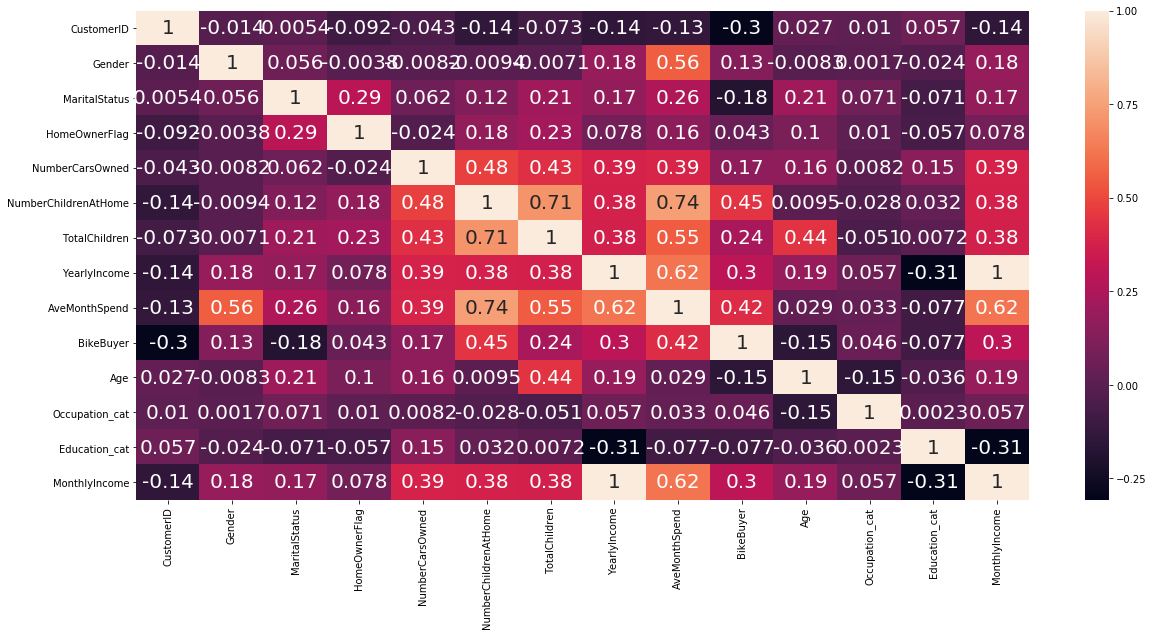

In [39]:
#Now let's see the updated correlation matrix with the columns that have been transformed
data = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(data,
            xticklabels=data.columns.values,
            yticklabels=data.columns.values, annot_kws={'size': 20}, annot=True)
plt.show()

Average monthly income positively correlates with Gender, Number of children at home(strongly), Yearly income, total number of children, bike buyer, number of cars owned and Monthly Income

Surprsingly, the correlation with Marital Status,Home Owner status,Age,Occupation and Educational Level are weak with a negative correlation between education.

We can also see that some columns are highly correlated with each other such as Number of Children at home and Total Children and Yearly Income and Monthly Income. So we can drop one of each from the pairs in order to avoid colinearity.



In [40]:
#Now lets select the features will we use for our predictive analysis

cols = train.select_dtypes(np.number).columns
columns = []
for col in cols:
    columns.append(col)

#We are picking features that correlate with AVerage monthly spend greater than or equal to 0.02 or less than or equal to - 0.03
selected = []
for col in columns:
    if (train.AveMonthSpend.corr(train[col]) >= 0.02) |( train.AveMonthSpend.corr(train[col]) <= -0.03): 
        selected.append(col)
        
features = train[selected]
features.head()

,CustomerID,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age,Occupation_cat,Education_cat,MonthlyIncome
0,22409,0,0,1,0,0,0,11336,37,0,40,0,0,944.666667
1,15809,1,1,1,3,4,5,81978,135,1,59,4,3,6831.500000
2,27510,1,0,0,2,0,0,86892,70,0,43,3,3,7241.000000
3,17627,1,1,1,0,1,1,68021,90,1,45,4,0,5668.416667
4,21238,1,0,0,2,0,0,52525,64,1,39,4,2,4377.083333


We can see the columns that have been selected. However there are some who meet the correlation rule we set that we need to drop such as Yearly income and Total Children because we already have Monthly income and Number of children at home, in order to avoid colinearity. 

We will drop Customer ID as well as it is irrelevant. 

Ave Month spend is the target variable so it has to be dropped.

In [41]:
features.columns

Index(['CustomerID', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age', 'Occupation_cat',
       'Education_cat', 'MonthlyIncome'],
      dtype='object')

In [42]:
#Keep only the features that we need 
test = test[['Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'BikeBuyer', 'Age', 'Occupation_cat',
       'Education_cat', 'MonthlyIncome']]
test.head(4)

,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,BikeBuyer,Age,Occupation_cat,Education_cat,MonthlyIncome
0,0,1,1,2,3,1,55,3,0,7242.666667
1,0,0,0,2,0,0,79,3,2,4626.333333
2,1,1,0,2,1,0,62,0,4,1547.500000
3,1,1,0,0,3,1,53,4,0,10093.333333


In [43]:
#store columns in x and y where x is for features and y is for target
y = features['AveMonthSpend']

#drop some features as they wont be useful to us 
x  = features.drop(axis = 1, columns = ['YearlyIncome', 'TotalChildren','AveMonthSpend','CustomerID'])



In [44]:
#Check
y[:5]

0     37
1    135
2     70
3     90
4     64
Name: AveMonthSpend, dtype: int64

In [45]:
#make a copy x of the features so we can use here as a checkpoint during reiteration 
X = x.copy()


In [46]:
# Check to see the data types of our features 
X.dtypes

Gender                    int64
MaritalStatus             int64
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
BikeBuyer                 int64
Age                       int64
Occupation_cat            int64
Education_cat             int64
MonthlyIncome           float64
dtype: object

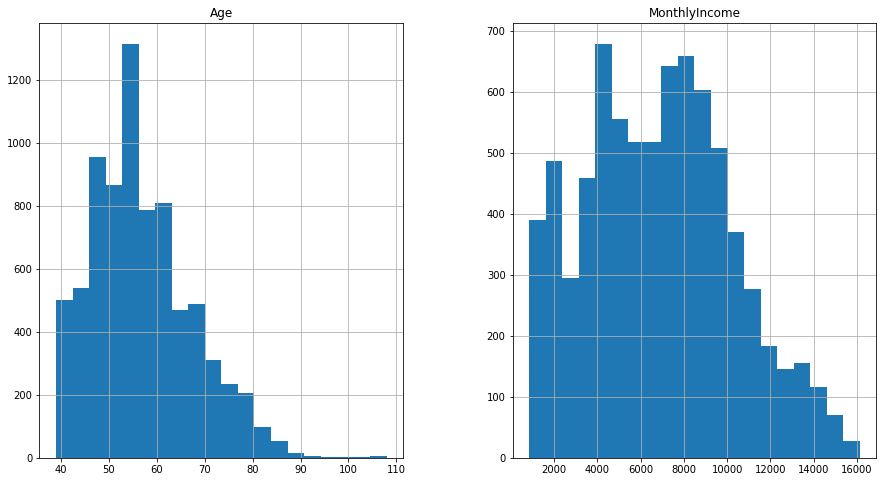

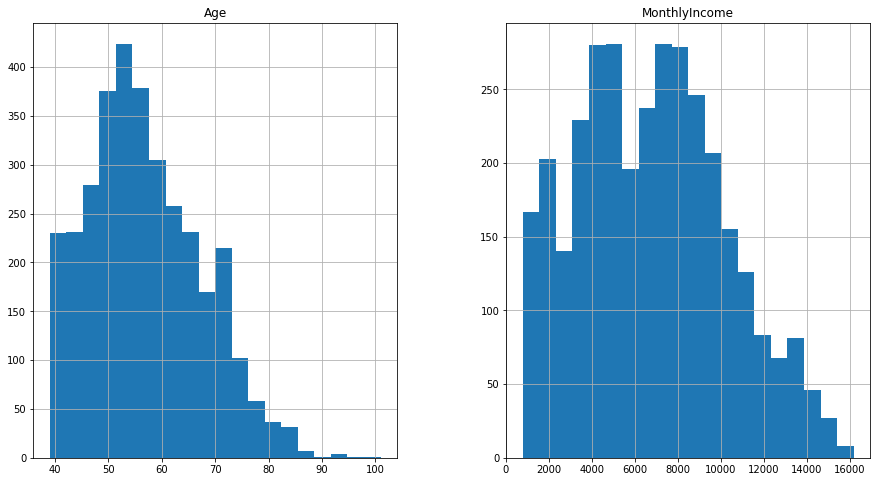

In [47]:
#Now before we get to modelling, we need to make sure our features meet some assumptions that our model relies on 
#Such as: Our features are normally distributed

#Histogram to understand the distribution of our target features
X[['Age','MonthlyIncome']].hist(bins = 20, figsize = (15,8));

#Do the same for the test
test[['Age','MonthlyIncome']].hist(bins = 20, figsize = (15,8));

We can see that the Age is not normally distributed and the scale of our Monthly Income is larger than the other features. We need to fix it

In [48]:
#Take the log of Age
X['Age'] = np.log(X['Age'])

#Scale  the Monthly Income
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X['MonthlyIncome'] = scaler.fit_transform(X['MonthlyIncome'].values.reshape(-1,1))

#Same for test
test['Age'] = np.log(test['Age'])

#Scale  the Monthly Income
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
test['MonthlyIncome'] = scaler.fit_transform(test['MonthlyIncome'].values.reshape(-1,1))





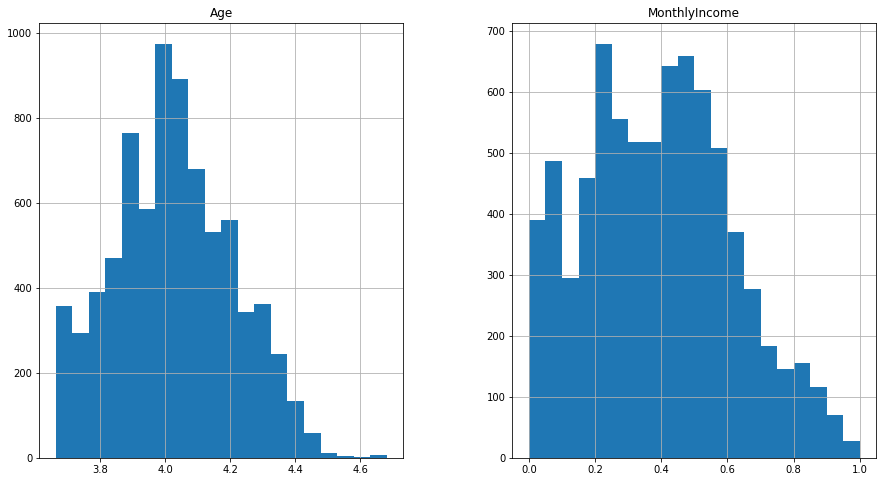

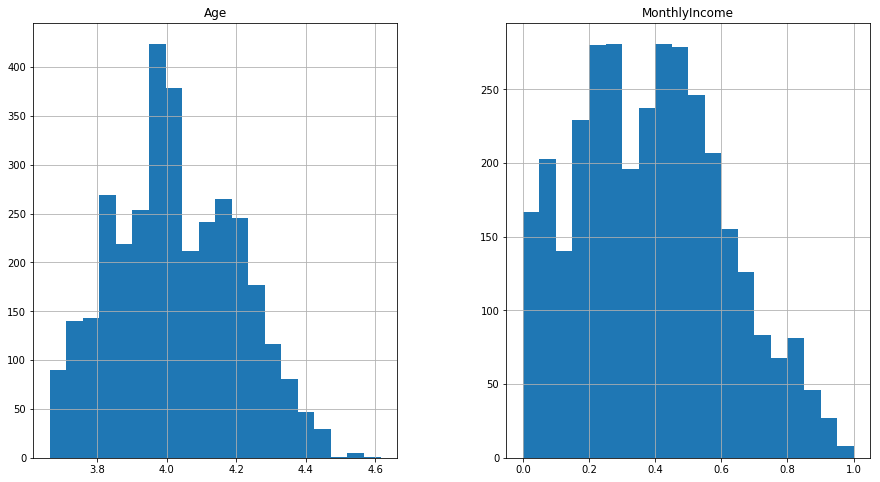

In [49]:
#View the transformed features
X[['Age','MonthlyIncome']].hist(bins = 20, figsize = (15,8));
test[['Age','MonthlyIncome']].hist(bins = 20, figsize = (15,8));

The distruibution of the Age looks more normally distributed and the scale of our monthly income has been reduced

In [50]:
#check to see size of features and target
print('The size of the features are:',X.shape)
print('The size of the target is:', y.shape)

The size of the features are: (7654, 10)
The size of the target is: (7654,)


# MODELLING

We will start with a basic linear regression model, then try a Random Forest Model and then optimize

In [51]:
#Let's get to modelling
from sklearn.model_selection import train_test_split
from sklearn import linear_model
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

#check the shape of the train and validation data 
print('The size of the train features data is:',train_X.shape)
print('The size of the validation features data is:',val_X.shape)
print('The size of the train target data is:', train_y.shape)
print('The size of the validation targer data is:', val_y.shape)

The size of the train features data is: (6123, 10)
The size of the validation features data is: (1531, 10)
The size of the train target data is: (6123,)
The size of the validation targer data is: (1531,)


In [52]:
#Create a linear regression model and fit it on the train data (X and y)
lm = linear_model.LinearRegression()
model = lm.fit(train_X, train_y)

In [53]:
#use our linear regression model to predict the target, using our validation data 
y_predicted_lm = lm.predict(val_X)
print(y_predicted_lm[0:5])

[ 74.10713662 102.86181494 153.81721819  97.43872948 105.97695744]


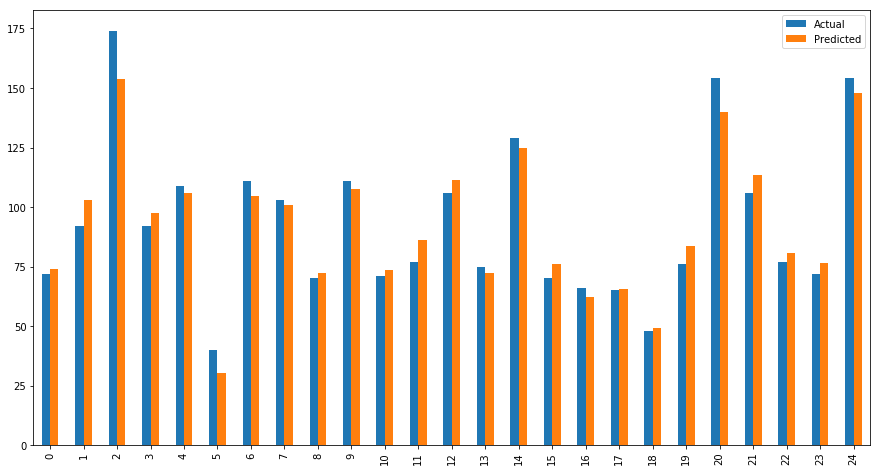

In [54]:
#Let's visualize how far off our prediction is from the actual value
accuracy = pd.DataFrame({'Actual':val_y.values.flatten(),'Predicted':y_predicted_lm.flatten() })
accuracy.head(25).plot.bar(figsize = (15,8));

Our model is not too far off from the actual value. 

In [55]:
#Let us see how our model actually fared
from sklearn.metrics import mean_squared_error
from math import sqrt

#let us rename our variable for ease
y_actual = val_y
rms = sqrt(mean_squared_error(y_actual, y_predicted_lm))

print('The score of the model:', lm.score(val_X,val_y))
print('The coef of the model:', lm.coef_)
print("The MSE: ",mean_squared_error(y_actual,y_predicted_lm))
print('The RMSE:', rms)

The score of the model: 0.9467485052976403
The coef of the model: [29.85140869  7.02223379 -0.42380245 -0.23486162 11.1566131   0.6024378
 -6.22793069  0.42299244  0.24453507 37.16348864]
The MSE:  45.8809824468327
The RMSE: 6.773550209958785


Our model is 95% accurate !


- COEFF
- for gender, men are more likely to spend 30 dollars more than women
- For marital status, married people are more likely to spend 7 dollrs more than single
- For Home owner status, a home owner spends 42 cents less than none home owners on average in the bike shop
- for Number of Cars, gain an extra car and you spend 23 cent less on average 
- for Number of children at home, an extra child at home and you spend 11 dollars on average in a a month
- for bike purchase, bike buyers spend a dollar less than none bike buyers on avaerage in a month
- for Monthly Income, ***


The MSE is 45 and RMSE is 6.7

We can do better

In [56]:
#let's try using another model.
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor(random_state = 42, n_estimators = 1000) 
rm.fit(train_X, train_y) #fit on our train data


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [57]:
y_predicted_rm = rm.predict(val_X) #predict using our validate features
print(y_predicted_rm[0:5])

[ 71.805  91.361 167.999  97.508 110.079]


In [58]:
#score of the model
rms = sqrt(mean_squared_error(y_actual, y_predicted_rm))
print("The score of Random Forest model is: ", rm.score(val_X,val_y)) #score using our validate data
print("The MSE: ",mean_squared_error(y_actual,y_predicted_rm))
print("The RMS is ", rms)

The score of Random Forest model is:  0.9868636577297961
The MSE:  11.318147828216851
The RMS is  3.3642455065314203


In [59]:
X_ = X[['NumberChildrenAtHome','Gender','MonthlyIncome','MaritalStatus','Age']]

This is a huge improvement from our linear regression model!

In [60]:

#Let's us try another model without spliting our train data, so that the model has more samples to learn from 
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=1000, random_state= 0,learning_rate=0.03)
model.fit(X,y) #using all of our train data
predictions = model.predict(X)

In [61]:
#score of the model
rms = sqrt(mean_squared_error(y, predictions))
print("The score of the Gradient Boost Regressor is: ",model.score(X,y))
print("The MSE: ",mean_squared_error(y,predictions))
print("The RMSE is ", rms)




The score of the Gradient Boost Regressor is:  0.9902489629385657
The MSE:  8.464722243124926
The RMSE is  2.9094195715167874


In [62]:
test_prediction = predictions = model.predict(test)

In [63]:
#Save prediction for Kaggle submission
output = pd.DataFrame({'CustomerID':dftest.CustomerID, 'AveMonthSpend':test_prediction.round()})

output.to_csv('Submission file.csv', index=False)